<!--HEADER-->
[*Notas sobre modelagem da epidemia de Covid-19*](https://github.com/rmsrosa/modcovid19) / [*IM-UFRJ*](https://www.im.ufrj.br).

<!--BADGES-->
<a href="../slides/05.00-Qualidade_e_comparacao_de_modelos.slides.html" target="_blank"><img align="left" src="https://img.shields.io/badge/local-slides-darkgreen" alt="localslides" title="Local Slides"></a>
&nbsp;

<!--NAVIGATOR-->
[<- Modelos compartimentais estruturados](04.00-Compartimentais_estruturados.ipynb) | [Página Inicial](00.00-Pagina_Inicial.ipynb) | [Modelos baseados em indivíduos e o relatório do Imperial Colege ->](06.00-Modelos_baseados_em_individuos.ipynb)

---


# Modelagem Covid-19


In [1]:
using Random
using Statistics
using LinearAlgebra
using CSV
using DataFrames
using Plots
theme(:ggplot2)

┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1317


In [13]:
function info_ajuste2(dados_x, dados_y, model_y, k)
    N = length(dados_x)
    y_mean = mean(dados_y)
    residuos = model_y - dados_y
    ss = norm(residuos)^2
    rms = sqrt(ss/N)
    ss_y = norm(dados_y)^ 2
    rms_y = sqrt(ss_y/N)

    ss_rel = ss/ss_y
    rms_rel = sqrt(ss_rel)
    ss_tot = N*var(dados_y)
    ss_reg = norm(model_y .- y_mean)^2
    r_sq = ss_reg/ss_tot
    r_sq_aj = 1 - (1 - r_sq)*(N-1)/(N-k)
    
    aic = N*log(ss/N) + 2*(k+1)
    aicc = N*log(ss/N) + 2*(k+1) + (2*(k+1)*(k+2))/(N-k-1)
    bic =  N*log(ss/N) + 2*log(N)*(k+1)
    
    return (
        residuos=residuos, rms=rms, rms_rel=rms_rel, ss=ss, ss_rel=ss_rel,
        r_sq=r_sq, r_sq_aj=r_sq_aj, aic=aic, aicc=aicc, bic=bic
    )
end

info_ajuste2 (generic function with 1 method)

In [23]:
#download("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv", "time_series_covid19_confirmed_global.csv")
download("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv", "time_series_covid19_deaths_global.csv")


download("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv", "time_series_covid19_recovered_global.csv")


df_conf = DataFrame(CSV.File("time_series_covid19_confirmed_global.csv"))
nothing

In [26]:
df

,Province/State,Country/Region,Lat,Long,1/22/20
,String?,String,Float64?,Float64?,Int64
1,missing,Afghanistan,33.9391,67.71,0
2,missing,Albania,41.1533,20.1683,0
3,missing,Algeria,28.0339,1.6596,0
4,missing,Andorra,42.5063,1.5218,0
5,missing,Angola,-11.2027,17.8739,0
6,missing,Antigua and Barbuda,17.0608,-61.7964,0
7,missing,Argentina,-38.4161,-63.6167,0
8,missing,Armenia,40.0691,45.0382,0
9,Australian Capital Territory,Australia,-35.4735,149.012,0


In [43]:
println("Tamanho: $(round(Base.summarysize(df)/1024/1024, digits=2)) Mb")

Tamanho: 1.09 Mb


### Últimas datas

In [40]:
df[1,end-10:end]

Últimas datas


,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,58730,58843,59015,59225,59370,59576,59745,59939,60122,60300


In [82]:
using Dates

In [84]:
?DateTime

search: DateTime datetime2unix datetime2rata datetime2julian ISODateTimeFormat



```
DateTime
```

`DateTime` wraps a `UTInstant{Millisecond}` and interprets it according to the proleptic Gregorian calendar.

---

```
DateTime(y, [m, d, h, mi, s, ms]) -> DateTime
```

Construct a `DateTime` type by parts. Arguments must be convertible to [`Int64`](@ref).

---

```
DateTime(periods::Period...) -> DateTime
```

Construct a `DateTime` type by `Period` type parts. Arguments may be in any order. DateTime parts not provided will default to the value of `Dates.default(period)`.

---

```
DateTime(d::Date, t::Time)
```

Construct a `DateTime` type by `Date` and `Time`. Non-zero microseconds or nanoseconds in the `Time` type will result in an `InexactError`.

!!! compat "Julia 1.1"
    This function requires at least Julia 1.1.


```jldoctest
julia> d = Date(2018, 1, 1)
2018-01-01

julia> t = Time(8, 15, 42)
08:15:42

julia> DateTime(d, t)
2018-01-01T08:15:42
```

---

```
DateTime(dt::Date) -> DateTime
```

Convert a `Date` to a `DateTime`. The hour, minute, second, and millisecond parts of the new `DateTime` are assumed to be zero.

---

```
DateTime(f::Function, y[, m, d, h, mi, s]; step=Day(1), limit=10000) -> DateTime
```

Create a `DateTime` through the adjuster API. The starting point will be constructed from the provided `y, m, d...` arguments, and will be adjusted until `f::Function` returns `true`. The step size in adjusting can be provided manually through the `step` keyword. `limit` provides a limit to the max number of iterations the adjustment API will pursue before throwing an error (in the case that `f::Function` is never satisfied).

# Examples

```jldoctest
julia> DateTime(dt -> Dates.second(dt) == 40, 2010, 10, 20, 10; step = Dates.Second(1))
2010-10-20T10:00:40

julia> DateTime(dt -> Dates.hour(dt) == 20, 2010, 10, 20, 10; step = Dates.Hour(1), limit = 5)
ERROR: ArgumentError: Adjustment limit reached: 5 iterations
Stacktrace:
[...]
```

---

```
DateTime(dt::AbstractString, format::AbstractString; locale="english") -> DateTime
```

Construct a `DateTime` by parsing the `dt` date time string following the pattern given in the `format` string (see [`DateFormat`](@ref)  for syntax).

This method creates a `DateFormat` object each time it is called. If you are parsing many date time strings of the same format, consider creating a [`DateFormat`](@ref) object once and using that as the second argument instead.

---

```
DateTime(dt::AbstractString, df::DateFormat=ISODateTimeFormat) -> DateTime
```

Construct a `DateTime` by parsing the `dt` date time string following the pattern given in the [`DateFormat`](@ref) object, or dateformat"yyyy-mm-ddTHH:MM:SS.s" if omitted.

Similar to `DateTime(::AbstractString, ::AbstractString)` but more efficient when repeatedly parsing similarly formatted date time strings with a pre-created `DateFormat` object.


In [87]:
names(df)

473-element Vector{String}:
 "Province/State"
 "Country/Region"
 "Lat"
 "Long"
 "1/22/20"
 "1/23/20"
 "1/24/20"
 "1/25/20"
 "1/26/20"
 "1/27/20"
 "1/28/20"
 "1/29/20"
 "1/30/20"
 ⋮
 "4/23/21"
 "4/24/21"
 "4/25/21"
 "4/26/21"
 "4/27/21"
 "4/28/21"
 "4/29/21"
 "4/30/21"
 "5/1/21"
 "5/2/21"
 "5/3/21"
 "5/4/21"

In [99]:
dates = Date.(collect(names(df)[5:end]), dateformat"mm/dd/yy")

469-element Vector{Date}:
 0020-01-22
 0020-01-23
 0020-01-24
 0020-01-25
 0020-01-26
 0020-01-27
 0020-01-28
 0020-01-29
 0020-01-30
 0020-01-31
 0020-02-01
 0020-02-02
 0020-02-03
 ⋮
 0021-04-23
 0021-04-24
 0021-04-25
 0021-04-26
 0021-04-27
 0021-04-28
 0021-04-29
 0021-04-30
 0021-05-01
 0021-05-02
 0021-05-03
 0021-05-04

In [64]:
df_br = filter(row -> row["Country/Region"] == "Brazil", df)

In [66]:
df_br

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20
,String?,String,Float64?,Float64?,Int64,Int64,Int64,Int64
1,missing,Brazil,-14.235,-51.9253,0,0,0,0


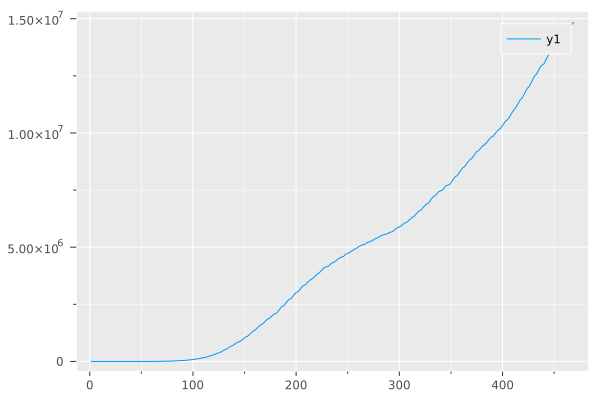

In [74]:
plot(collect(df_br[1,5:end]))

### Ajustando aos dados da Covid-19 no Brasil

In [34]:
def get_url_jh(filename):
    """
    Retorna o endereço URL do arquivo 'filename' no repositório da John Hopkins University no github
    """
    return 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/' + filename

In [35]:
df = pd.read_csv(get_url_jh('time_series_covid19_confirmed_global.csv'))
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

In [36]:
df_confirmed = pd.read_csv(get_url_jh('time_series_covid19_confirmed_global.csv'))
df_recovered = pd.read_csv(get_url_jh('time_series_covid19_recovered_global.csv'))
df_deaths = pd.read_csv(get_url_jh('time_series_covid19_deaths_global.csv'))

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [37]:
df_pop = pd.read_csv("../input/population-dataset-countrywise/population_dataset.csv")
df_pop_2020 = df_pop[df_pop['year'] == '2020'].drop('year', axis=1).drop_duplicates(subset='country_name', keep='first')
df_pop_2020.rename(columns={'country_name':'Country', 'population':'Population'}, inplace=True)

In [38]:
def get_country_data(country, percount = False, case = '', threshold = 0):
    """
    Retorna um *DataFrame* do pandas com os dados conjuntos de um mesmo país.
    
    Junta os dados dos três *DataFrames* de casos confirmados, recuperados e decessos 
    em um mesmo *DataFrame*.
    
    Opção para retornar dados absolutos ou relativos à população total, em relação a
    um número de `percount`, por exemplo `percount=`100` para porcentagem, ou 
    `percount=1000` para cada mil habitantes.
    
    Opção para descartar os dados em que a quantidades de casos do tipo `case` é
    menor do que o valor `threshold`.
    """

    data = pd.DataFrame({'Confirmed':df_confirmed.loc[df_confirmed['Country'].str.contains(country)].sum(0).iloc[4:], 
                         'Recovered':df_recovered.loc[df_recovered['Country'].str.contains(country)].sum(0).iloc[4:],
                         'Deaths':df_deaths.loc[df_deaths['Country'].str.contains(country)].sum(0).iloc[4:]
                        })
    if threshold and case in ('Confirmed', 'Recovered', 'Deaths'):
        data = data[data[case].ge(threshold)]

    if percount:
        data = percount*data/int(df_pop_2020[df_pop_2020['Country']==country].iloc[0,1].replace(',',''))

    return data

In [39]:
df_Brazil_confirmed_10 = get_country_data('Brazil', False, 'Confirmed', 10)['Confirmed']
c_amostra = np.log(df_Brazil_confirmed_10.to_numpy(dtype=int))
t_amostra = np.array([j for j in range(len(c_amostra))])

In [40]:
J = len(t_amostra)
A = [np.array([t_amostra**i for i in range(j, -1, -1)]).T for j in range(J)]
lsq = [np.linalg.lstsq(A[j], c_amostra, rcond=None) for j in range(J)]
beta_hat = [lsq[j][0] for j in range(J)]

In [41]:
def f_poly(t, coef):
    d = len(coef)
    return np.sum([coef[i]*t**(d-1-i) for i in range(d)], axis=0)
t = np.linspace(t_amostra[0], t_amostra[-1], 200)

c_hats = [f_poly(t_amostra, beta_hat[j]) for j in range(J)]
c_models = [f_poly(t, beta_hat[j]) for j in range(J)]
analise = [analise_ajuste(t_amostra, c_amostra, model_fun = f_poly, model_args = [beta_hat[j]])
           for j in range(J)]

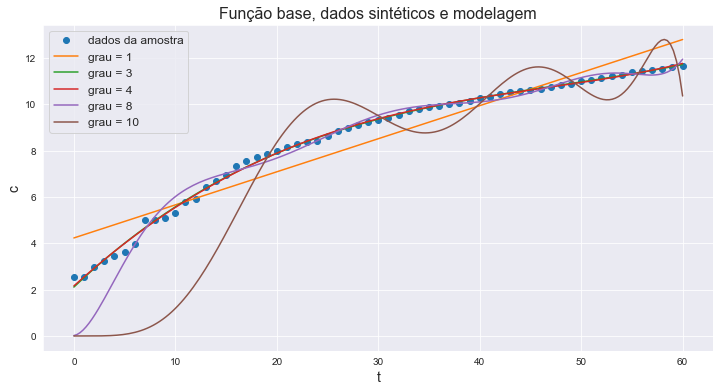

In [42]:
plt.figure(figsize=(12,6))
plt.plot(t_amostra, c_amostra, 'o', label='dados da amostra')
for j in (1,3,4,8,10):
    plt.plot(t, c_models[j], label=f'grau = {j}')
plt.xlabel('t', fontsize=14)
plt.ylabel('c', fontsize=14)
plt.legend(fontsize=12)
plt.title('Função base, dados sintéticos e modelagem', fontsize=16)
plt.show()

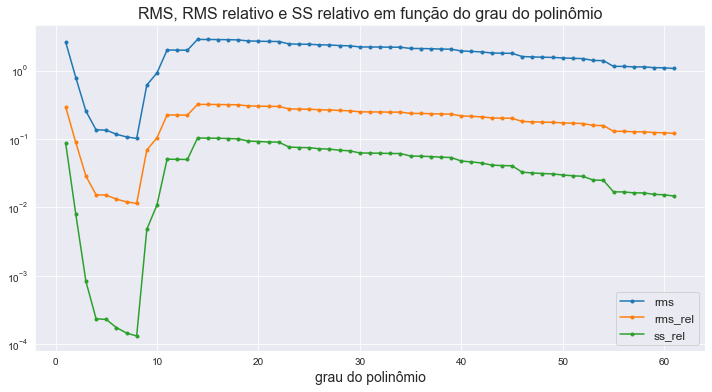

In [43]:
plt.figure(figsize=(12,6))

plt.plot(range(1, J+1),[analise[j].rms for j in range(J)], '.-', label='rms')
plt.plot(range(1, J+1),[analise[j].rms_rel for j in range(J)], '.-', label='rms_rel')
plt.plot(range(1, J+1),[analise[j].ss_rel for j in range(J)], '.-', label='ss_rel')

plt.yscale('log')
plt.title('RMS, RMS relativo e SS relativo em função do grau do polinômio', fontsize=16)
plt.xlabel('grau do polinômio', fontsize=14)
plt.legend(fontsize=12)
plt.show()

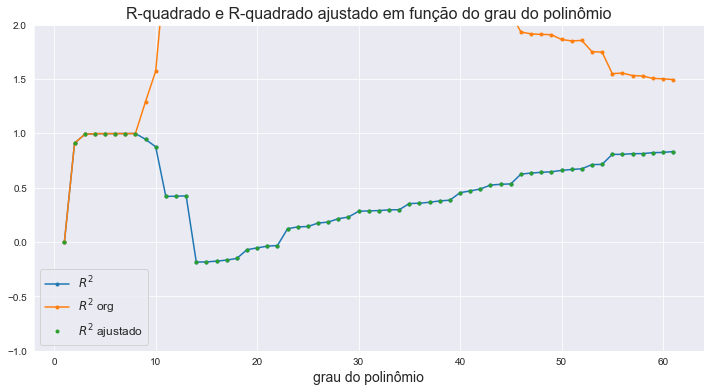

In [44]:
plt.figure(figsize=(12,6))

plt.plot(range(1, J+1),[analise[j].rsq for j in range(J)], '.-', label='$R^2$')
plt.plot(range(1, J+1),[analise[j].rsq_org for j in range(J)], '.-', label='$R^2$ org')
plt.plot(range(1, J+1),[analise[j].rsq_aj for j in range(J)], '.', label='$R^2$ ajustado')

plt.ylim([-1,2])
plt.title('R-quadrado e R-quadrado ajustado em função do grau do polinômio', fontsize=16)
plt.xlabel('grau do polinômio', fontsize=14)
plt.legend(fontsize=12)
plt.show()

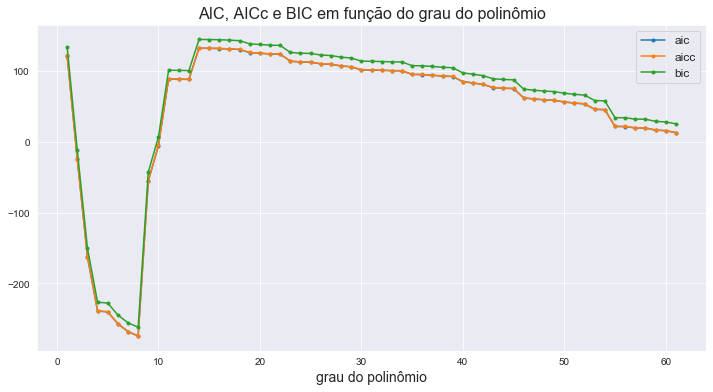

In [45]:
plt.figure(figsize=(12,6))

plt.plot(range(1, J+1), [analise[j].aic for j in range(J)], '.-', label='aic')
plt.plot(range(1, J+1),[analise[j].aicc for j in range(J)], '.-', label='aicc')
plt.plot(range(1, J+1),[analise[j].bic for j in range(J)], '.-', label='bic')

plt.title('AIC, AICc e BIC em função do grau do polinômio', fontsize=16)
plt.xlabel('grau do polinômio', fontsize=14)
plt.legend(fontsize=12)
plt.show()

<!--NAVIGATOR-->

---
[<- Modelos compartimentais estruturados](04.00-Compartimentais_estruturados.ipynb) | [Página Inicial](00.00-Pagina_Inicial.ipynb) | [Modelos baseados em indivíduos e o relatório do Imperial Colege ->](06.00-Modelos_baseados_em_individuos.ipynb)